In [1]:
"""
Simon Wang

This project implments a Neural Network model to perform classification of music
played by different instruments. This project also attemps to find an optimal
learn rate to maximize accuracy of the model.

Data for this project was first gathered from University of Iowa Electronic
Music Studios then processed and turned into mel-frequency cepstrum features by
Eric Humphrey and Juan Bellow.

http://theremin.music.uiowa.edu/
https://github.com/marl/dl4mir-tutorial/blob/master/README.md
"""

import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import librosa
import librosa.display
import librosa.feature
import requests
from google.colab import files
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
from tensorflow.keras import optimizers

# load data into training and testing sets
upload4 = files.upload()
Xtr = np.load('uiowa_train_data.npy')
ytr = np.load('uiowa_train_labels.npy')
Xts = np.load('uiowa_test_data.npy')
yts = np.load('uiowa_test_labels.npy')

# scale data
mean = np.mean(Xtr, axis=0)
std = np.std(Xtr, axis=0)
Xtr_scale = (Xtr-mean[None, :])/std[None, :]
Xts_scale = (Xts-mean[None, :])/std[None, :]

Saving uiowa_test_data.npy to uiowa_test_data.npy
Saving uiowa_test_labels.npy to uiowa_test_labels.npy
Saving uiowa_train_data.npy to uiowa_train_data.npy
Saving uiowa_train_labels.npy to uiowa_train_labels.npy


In [2]:
# interpret data
ntrain = Xtr.shape[0]
ntest = Xts.shape[0]
nfeat = Xtr.shape[1]
nclass = np.unique(yts).shape[0]
print('There are  %d  training samples.' % ntrain)
print('There are  %d  testing samples.' % ntest)
print('There are  %d    features for each sample.' % nfeat)
print('There are  %d     classes.' % nclass)

There are  66247  training samples.
There are  14904  testing samples.
There are  120    features for each sample.
There are  10     classes.


Epoch 1/10
663/663 [==============================] - 2s 3ms/step - loss: 0.3579 - accuracy: 0.9025 - val_loss: 0.1881 - val_accuracy: 0.9460
Epoch 2/10
663/663 [==============================] - 2s 3ms/step - loss: 0.1016 - accuracy: 0.9754 - val_loss: 0.1035 - val_accuracy: 0.9694
Epoch 3/10
663/663 [==============================] - 2s 3ms/step - loss: 0.0604 - accuracy: 0.9853 - val_loss: 0.0613 - val_accuracy: 0.9855
Epoch 4/10
663/663 [==============================] - 2s 3ms/step - loss: 0.0425 - accuracy: 0.9895 - val_loss: 0.0495 - val_accuracy: 0.9879
Epoch 5/10
663/663 [==============================] - 2s 3ms/step - loss: 0.0326 - accuracy: 0.9915 - val_loss: 0.0401 - val_accuracy: 0.9900
Epoch 6/10
663/663 [==============================] - 2s 3ms/step - loss: 0.0254 - accuracy: 0.9935 - val_loss: 0.0377 - val_accuracy: 0.9897
Epoch 7/10
663/663 [==============================] - 2s 3ms/step - loss: 0.0210 - accuracy: 0.9946 - val_loss: 0.0335 - val_accuracy: 0.9901
Epoch 

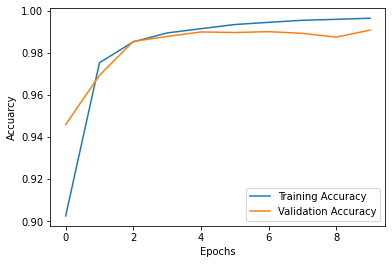

In [3]:
# construct the model
K.clear_session()
nh = 256
nin = Xtr_scale.shape[1]
nout = nclass
model = Sequential()
model.add(Dense(units=nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
model.add(Dense(units=nout, activation='softmax', name='output'))

# compile model with Adam optimization learn rate 0.001
opt = optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
hist = model.fit(Xtr_scale, ytr, epochs=10, batch_size=100, validation_data=(Xts_scale,yts))

# examine model accuracies
tr_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(np.arange(10), tr_acc)
plt.plot(np.arange(10), val_acc)
plt.xlabel('Epochs')
plt.ylabel('Accuarcy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])

Epoch 1/20
663/663 [==============================] - 2s 3ms/step - loss: 0.1055 - accuracy: 0.9675 - val_loss: 0.0356 - val_accuracy: 0.9891
Epoch 2/20
663/663 [==============================] - 2s 3ms/step - loss: 0.0290 - accuracy: 0.9903 - val_loss: 0.1143 - val_accuracy: 0.9575
Epoch 3/20
663/663 [==============================] - 2s 3ms/step - loss: 0.0216 - accuracy: 0.9929 - val_loss: 0.0313 - val_accuracy: 0.9899
Epoch 4/20
663/663 [==============================] - 2s 3ms/step - loss: 0.0191 - accuracy: 0.9939 - val_loss: 0.0372 - val_accuracy: 0.9866
Epoch 5/20
663/663 [==============================] - 2s 3ms/step - loss: 0.0190 - accuracy: 0.9946 - val_loss: 0.0287 - val_accuracy: 0.9897
Epoch 6/20
663/663 [==============================] - 2s 3ms/step - loss: 0.0143 - accuracy: 0.9952 - val_loss: 0.0458 - val_accuracy: 0.9835
Epoch 7/20
663/663 [==============================] - 2s 3ms/step - loss: 0.0144 - accuracy: 0.9952 - val_loss: 0.0378 - val_accuracy: 0.9879
Epoch 

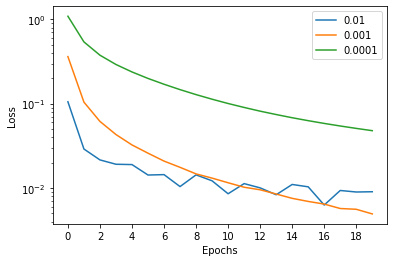

In [4]:
# cross validate to optimize Adam optimizer learning rate
rates = [0.01,0.001,0.0001]
batch_size = 100
loss_hist = []
for lr in rates:
  K.clear_session()
  model = Sequential()
  model.add(Dense(units=nh, input_shape=(nin,), activation='sigmoid', name='hidden'))
  model.add(Dense(units=nout, activation='softmax', name='output'))
  opt = optimizers.Adam(lr=lr)
  model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  hist = model.fit(Xtr_scale, ytr, epochs=20, batch_size=100, validation_data=(Xts_scale,yts))
  loss_hist.append(hist.history['loss'])

# examine loss resulting from the different learning rates
plt.semilogy(np.arange(20), loss_hist[0])
plt.semilogy(np.arange(20), loss_hist[1])
plt.semilogy(np.arange(20), loss_hist[2])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(20, step=2))
plt.legend(rates)